In [1]:
#Loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#uploading the dataframes
NSE2013 = pd.read_csv('Datasets/NSE_data_all_stocks_2013.csv')
NSE2014 = pd.read_csv('Datasets/NSE_data_all_stocks_2014.csv')
NSE2015 = pd.read_csv('Datasets/NSE_data_all_stocks_2015.csv')
NSE2016 = pd.read_csv('Datasets/NSE_data_all_stocks_2016.csv')
NSE2017 = pd.read_csv('Datasets/NSE_data_all_stocks_2017.csv')
NSE2018 = pd.read_csv('Datasets/NSE_data_all_stocks_2018.csv')
NSE2019 = pd.read_csv('Datasets/NSE_data_all_stocks_2019.csv')
NSE2020 = pd.read_csv('Datasets/NSE_data_all_stocks_2020.csv')
NSE_2013 = pd.read_csv('Datasets/NSE_data_stock_market_sectors_2013.csv')
NSE_2020 = pd.read_csv('Datasets/NSE_data_stock_market_sectors_2020.csv')

# 2013 NSE DATA ANALYSIS

In [3]:
#Loading the dataframe
NSE2013.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,2-Jan-13,EGAD,Eaagads Ltd,8.2,14,25,25,25,25,-,-,-,-
1,2-Jan-13,KUKZ,Kakuzi Plc,300,423.5,67.5,67.5,67.5,72,-4.5,6.25%,300,-
2,2-Jan-13,KAPC,Kapchorua Tea Kenya Plc,59,95,118,118,118,118,-,-,-,59
3,2-Jan-13,LIMT,Limuru Tea Plc,385,475,430,430,430,430,-,-,-,215
4,2-Jan-13,SASN,Sasini Plc,14.8,19.6,11.7,12.05,11.9,11.7,0.2,1.71%,"14,500",-


In [4]:
#Loading the dataframe
NSE2013.tail()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
14884,31-Dec-13,SCOM,Safaricom Plc,23.5,33.5,10.8,10.95,10.85,10.85,-,-,"2,461,000",-
14885,31-Dec-13,^FNK15,FTSE NSE Kenya 15 Index,154.41,227.73,172.4,172.4,172.4,172.84,-0.44,0.25%,-,-
14886,31-Dec-13,^FNK25,FTSE NSE Kenya 25 Index,162.87,238.71,174.27,174.27,174.27,174.56,-0.29,0.17%,-,-
14887,31-Dec-13,^N20I,NSE 20-Share Index,"1,873.47","2,766.77","4,926.97","4,926.97","4,926.97","4,874.29",52.68,1.08%,-,-
14888,31-Dec-13,^NASI,NSE All-Share Index,124.3,171.36,136.65,136.65,136.65,135.83,0.82,0.60%,-,-


In [5]:
#Showing how many row and columns in the dataframe: 14889 rows 13 columns
NSE2013.shape

(14889, 13)

In [7]:
#Here we will display the data type of the all columns in the dataframe
NSE2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14889 entries, 0 to 14888
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DATE       14889 non-null  object
 1   CODE       14889 non-null  object
 2   NAME       14889 non-null  object
 3   12m Low    14889 non-null  object
 4   12m High   14889 non-null  object
 5   Day Low    14889 non-null  object
 6   Day High   14889 non-null  object
 7   Day Price  14889 non-null  object
 8   Previous   14889 non-null  object
 9   Change     14889 non-null  object
 10  Change%    14889 non-null  object
 11  Volume     14889 non-null  object
 12  Adjust     14889 non-null  object
dtypes: object(13)
memory usage: 1.5+ MB


From the above the information displayed it indicates that all the data type in our data that is an object which is wrong
because we do have float and integer data type in our data frame hence we do require to do data cleaning.

DATA CLEANING
         This it is to help with missing data in our data set.

In [8]:
#Here i am change the data type in in change cloumn to be float.
NSE2013["Change"] = NSE2013["Change"].apply(pd.to_numeric)

ValueError: Unable to parse string "-" at position 0

Changing the change column data type  to numeric  hence because their is missing data that is notted by If there is a missing observation pandas would have filled with NaN but since there is a - character the entire feature is converted to string data type

In [9]:
NSE2013.iloc[0]

DATE            2-Jan-13
CODE                EGAD
NAME         Eaagads Ltd
12m Low              8.2
12m High              14
Day Low               25
Day High              25
Day Price             25
Previous              25
Change                 -
Change%                -
Volume                 -
Adjust                 -
Name: 0, dtype: object

The above shows that column change,change %, volume,Adjust has got missing values.

In [10]:
# Replacing the replace - character with NaN in the dataset
NSE2013= NSE2013.replace('^\s*-',np.nan, regex = True)

In [11]:
NSE2013.isnull().sum()

DATE             0
CODE             0
NAME             0
12m Low          0
12m High         0
Day Low          0
Day High         0
Day Price        0
Previous         1
Change        9670
Change%       5099
Volume        3231
Adjust       10521
dtype: int64

From the above we can observe that 5 column has got missing data.

In [12]:
NSE2013.dropna(axis = 0 ,inplace = True)
NSE2013.shape #The missing observations are removed

(1425, 13)

In [13]:
#checking if they are no null values in the data now.
NSE2013.isnull().sum()

DATE         0
CODE         0
NAME         0
12m Low      0
12m High     0
Day Low      0
Day High     0
Day Price    0
Previous     0
Change       0
Change%      0
Volume       0
Adjust       0
dtype: int64

In [14]:
#Display the first 5
NSE2013.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
8,2-Jan-13,COOP,Co-operative Bank of Kenya Ltd,10.5,17,12.75,13,12.75,12.6,0.15,1.19%,"123,300",9.11
9,2-Jan-13,DTK,Diamond Trust Bank Kenya Ltd,67.75,127,118,118,118,115,3,2.61%,"8,700",107.27
13,2-Jan-13,NBK,National Bank of Kenya Ltd,3.4,4.4,17.1,17.5,17.35,17.25,0.1,0.58%,"2,600",14.34
14,2-Jan-13,NCBA,NCBA Group Plc,24.9,40,38.75,39.25,39.1,38.45,0.65,1.69%,"56,100",32.31
21,2-Jan-13,NMG,Nation Media Group Plc,14.95,49.5,225,225,225,222,3,1.35%,900,187.5


From the above, i did delete the columns that had miss vaules hence the only that is availabe is the data with values in each column.

In [15]:
#Describeing the descriptive statistics of the dataframe
NSE2013.describe()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
count,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425
unique,247,19,19,31,40,475,454,601,616,69,434,941,801
top,27-Mar-13,HFCK,HF Group Ltd,2,7.9,25,58,56.5,56,0.05,0.29%,100,18.8
freq,15,128,128,174,128,23,20,10,12,180,16,40,11


In [16]:
NSE2013.duplicated().sum()

0

EXPLORATORY DATA ANALYSIS

In [17]:
#convert low, high,Day low,Day high,Day price,Previous,change,change%,Adjust and volume columns to numeric
NSE2013['12m Low']=NSE2013['12m Low'].astype(float)
NSE2013['12m High']=NSE2013['12m High'].astype(float)
NSE2013['Day Low']=NSE2013['Day Low'].astype(float)
NSE2013['Day High']=NSE2013['Day High'].astype(float)
NSE2013['Day Price']=NSE2013['Day Price'].astype(float)
NSE2013['Previous']=NSE2013['Previous'].astype(float)
NSE2013['Change']=NSE2013['Change'].astype(float)
NSE2013['Adjust']=NSE2013['Adjust'].astype(float)
NSE2013['Change%'] = pd.to_numeric(NSE2013['Change%'],errors = 'coerce')
NSE2013['Volume'] = pd.to_numeric(NSE2013['Volume'],errors = 'coerce')

In [18]:
NSE2013.dtypes

DATE          object
CODE          object
NAME          object
12m Low      float64
12m High     float64
Day Low      float64
Day High     float64
Day Price    float64
Previous     float64
Change       float64
Change%      float64
Volume       float64
Adjust       float64
dtype: object

converting low, high,Day low,Day high,Day price,Previous,change,change%,Adjust and volume columns to numeric which is float while enable me to do the exploratory analysis but when the data type indicate object i will be unable to do the analysis.

In [19]:
#finding the correlation among the variables
#This will give you a fair idea of the correlation strength between different variables
NSE2013.corr()

,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
12m Low,1.000000,0.993316,0.752656,0.745371,0.750015,0.750215,0.366332,NaN,0.026633,0.747738
12m High,0.993316,1.000000,0.773088,0.766662,0.770794,0.772529,0.344993,NaN,0.056813,0.783841
Day Low,0.752656,0.773088,1.000000,0.998630,0.999581,0.999372,0.498020,NaN,0.061767,0.913902
Day High,0.745371,0.766662,0.998630,1.000000,0.999358,0.998346,0.514448,NaN,0.067257,0.913896
Day Price,0.750015,0.770794,0.999581,0.999358,1.000000,0.999128,0.511861,NaN,0.063917,0.914452
Previous,0.750215,0.772529,0.999372,0.998346,0.999128,1.000000,0.475557,NaN,0.070136,0.918156
Change,0.366332,0.344993,0.498020,0.514448,0.511861,0.475557,1.000000,NaN,-0.056144,0.375447
Change%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Volume,0.026633,0.056813,0.061767,0.067257,0.063917,0.070136,-0.056144,NaN,1.000000,0.070491
Adjust,0.747738,0.783841,0.913902,0.913896,0.914452,0.918156,0.375447,NaN,0.070491,1.000000


<AxesSubplot:>

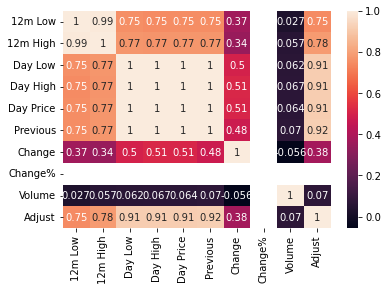

In [20]:
#The correlation matrix with the range from +1 to -1 
#where +1 is highly and positively correlated and -1 will be highly negatively correlated.
sns.heatmap(NSE2013.corr(), annot=True)

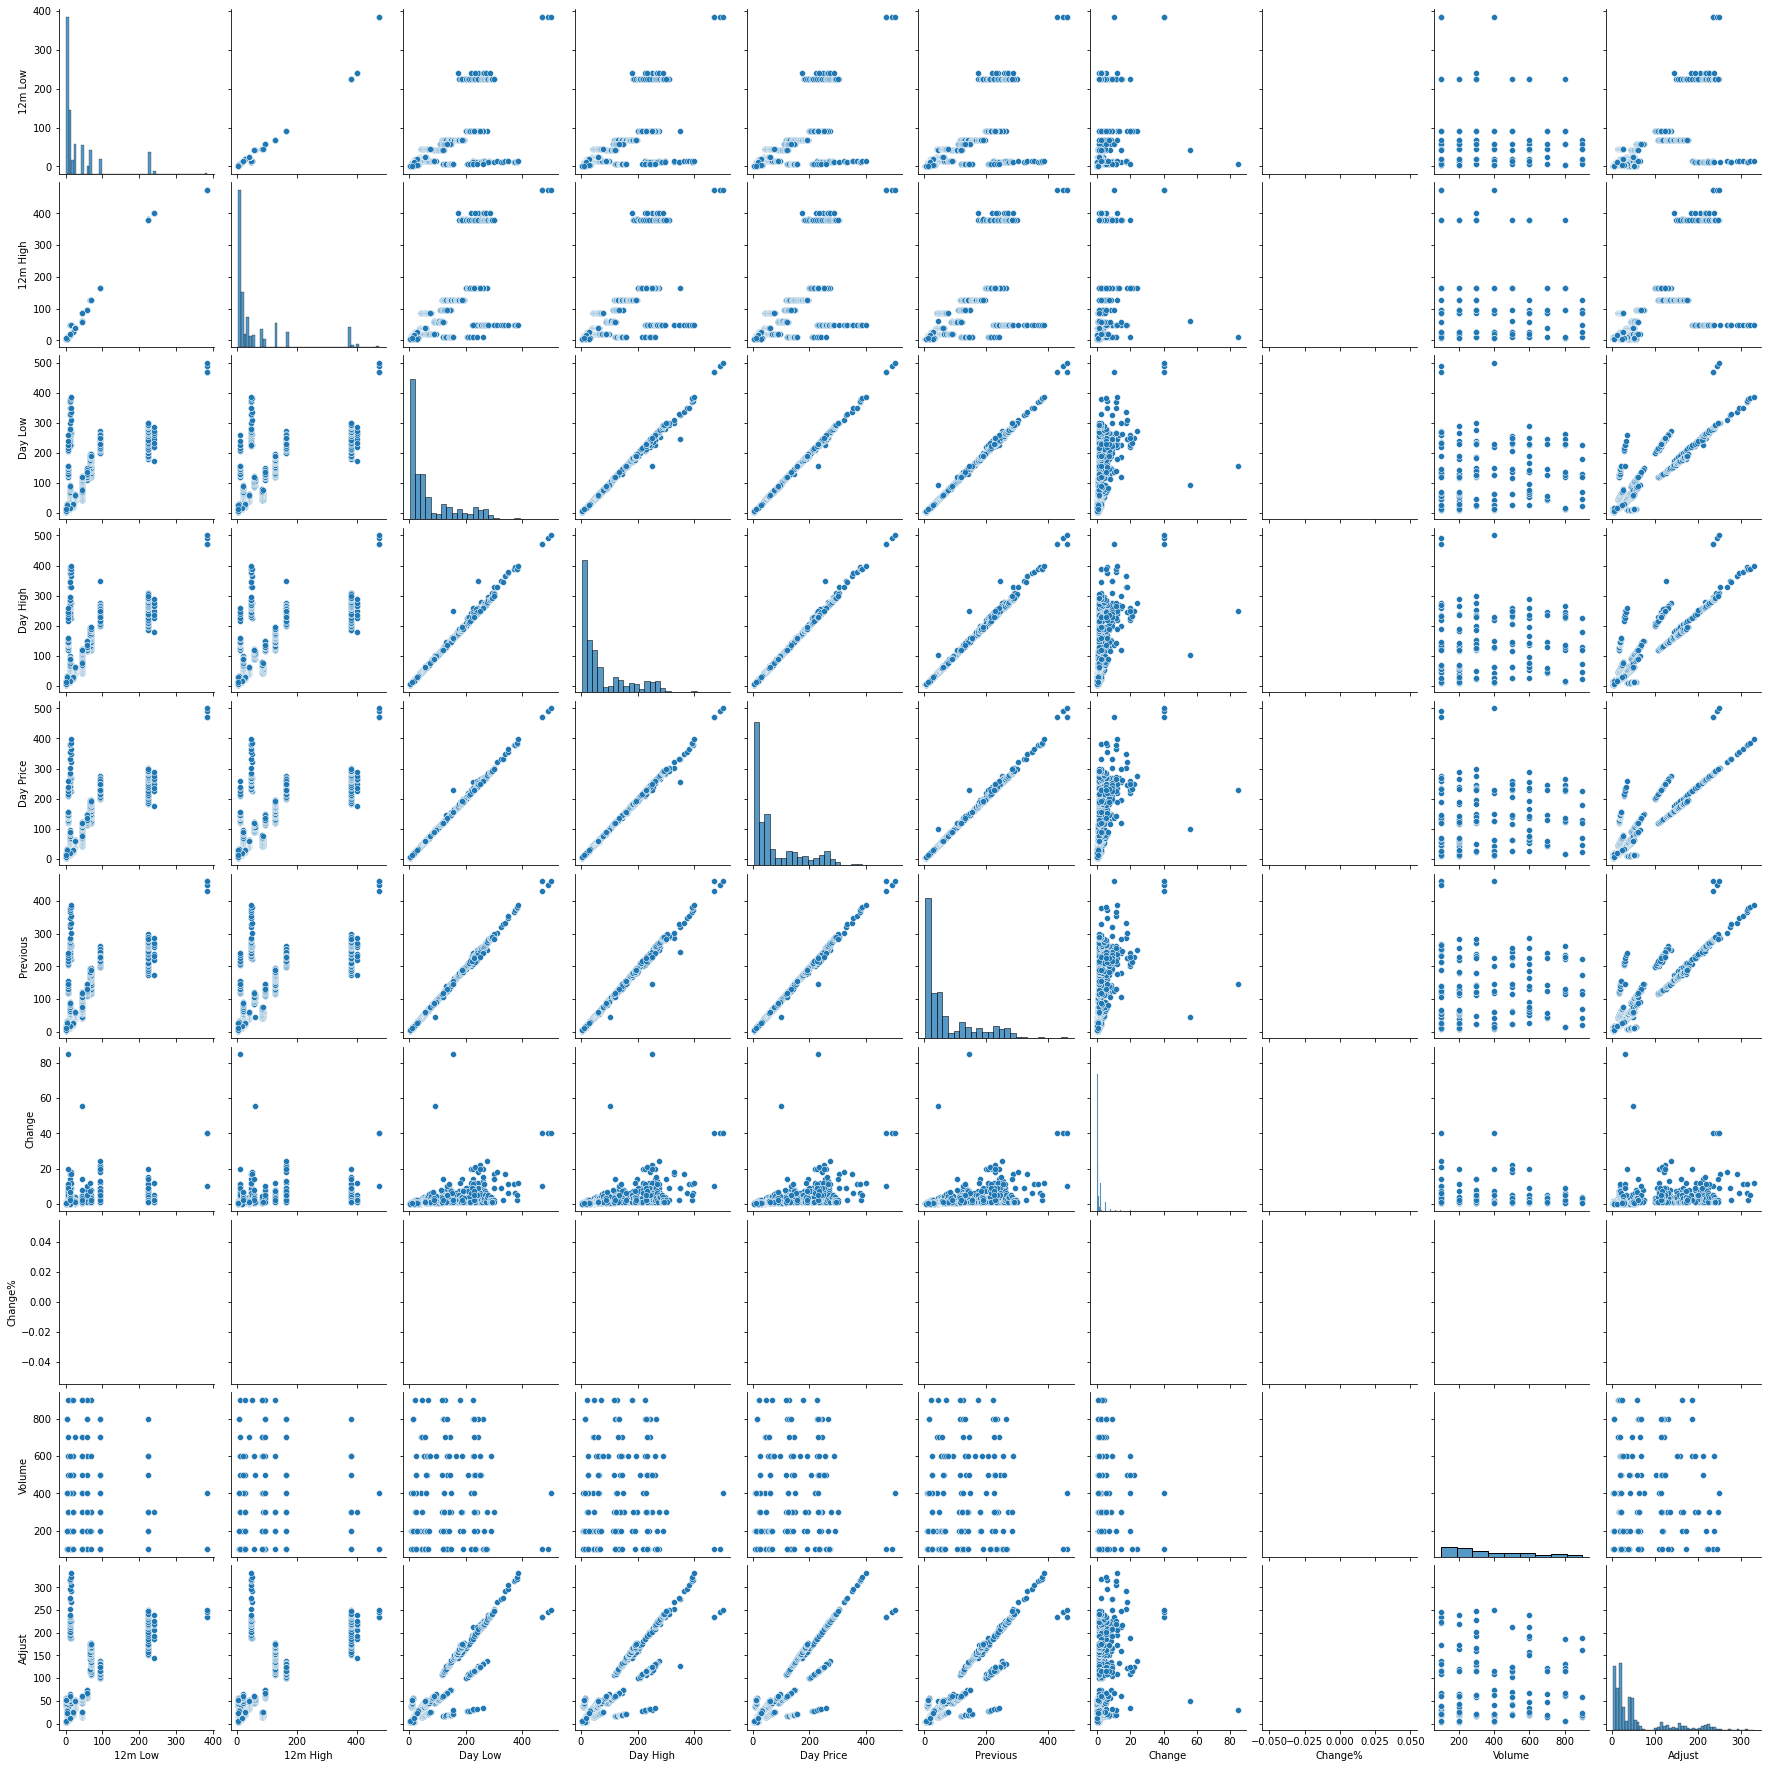

In [21]:
sns.pairplot(NSE2013)

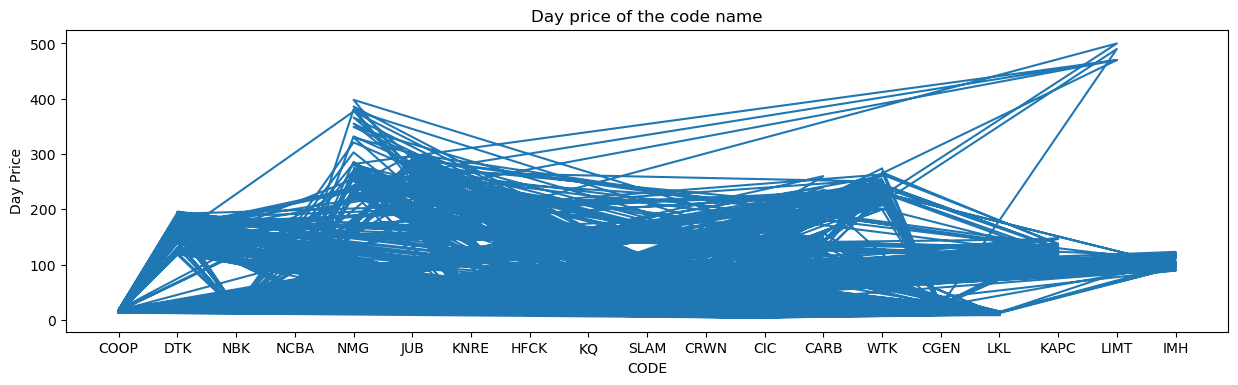

In [26]:
def plot_NSE2013(NSE2013, x, y, title="", xlabel='CODE', ylabel='Day Price', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_NSE2013(NSE2013, x=NSE2013['CODE'], y=NSE2013['Day Price'], title='Day price of the code name')

Visualization into time series where it display how the day price of the code keeps on changing gradually within time.

 # 2014 DATAFRAME

In [27]:
#Loading the dataframe
NSE2014.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,02-Jan-14,EGAD,Eaagads Ltd,8.2,14,23.75,23.75,23.75,23.75,-,-,"1,600",-
1,02-Jan-14,KUKZ,Kakuzi Plc,300,423.5,95,95,95,95,-,-,100,-
2,02-Jan-14,KAPC,Kapchorua Tea Kenya Plc,59,95,125,125,125,125,-,-,-,62.5
3,02-Jan-14,LIMT,Limuru Tea Plc,385,475,500,500,500,500,-,-,-,250
4,02-Jan-14,SASN,Sasini Plc,14.8,19,14.7,15,14.7,14.65,0.05,0.34%,"18,600",-


In [28]:
#Showing how many row and columns in the dataframe: 15696 rows 13 columns
NSE2014.shape

(15696, 13)

In [29]:
# In this it will display  the data type of the all columns in the dataframe
NSE2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15696 entries, 0 to 15695
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DATE       15695 non-null  object
 1   CODE       15695 non-null  object
 2   NAME       15695 non-null  object
 3   12m Low    15695 non-null  object
 4   12m High   15695 non-null  object
 5   Day Low    15695 non-null  object
 6   Day High   15695 non-null  object
 7   Day Price  15695 non-null  object
 8   Previous   15695 non-null  object
 9   Change     15695 non-null  object
 10  Change%    15695 non-null  object
 11  Volume     15695 non-null  object
 12  Adjust     15695 non-null  object
dtypes: object(13)
memory usage: 1.6+ MB


DATA CLEANING This it is to help with missing data in our data set.


In [30]:
NSE2014["Change"] = NSE2014["Change"].apply(pd.to_numeric)

ValueError: Unable to parse string "-" at position 0

In [31]:
NSE2014.iloc[0]

DATE           02-Jan-14
CODE                EGAD
NAME         Eaagads Ltd
12m Low              8.2
12m High              14
Day Low            23.75
Day High           23.75
Day Price          23.75
Previous           23.75
Change                 -
Change%                -
Volume             1,600
Adjust                 -
Name: 0, dtype: object

In [32]:
# Replacing the replace - character with NaN in the dataset
NSE2014= NSE2014.replace('^\s*-',np.nan, regex = True)

In [33]:
NSE2014.isnull().sum()

DATE             1
CODE             1
NAME             1
12m Low          1
12m High         1
Day Low          1
Day High         1
Day Price        1
Previous         1
Change       10090
Change%       4682
Volume        2958
Adjust       11656
dtype: int64

The above shows that we have missing values in my data.

In [34]:
NSE2014.dropna(axis = 0 ,inplace = True)
NSE2014.shape #The missing observations are removed

(1444, 13)

In [35]:
#checking if they are no null values in the data now.
NSE2014.isnull().sum()

DATE         0
CODE         0
NAME         0
12m Low      0
12m High     0
Day Low      0
Day High     0
Day Price    0
Previous     0
Change       0
Change%      0
Volume       0
Adjust       0
dtype: int64

In [36]:
#Display the first 20 with no missing values.
NSE2014.head(20)

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
6,02-Jan-14,CGEN,Car and General (K) Ltd,20,26,30,30.5,30.25,30,0.25,0.83%,"4,700",25.21
9,02-Jan-14,DTK,Diamond Trust Bank Kenya Ltd,67,127,195,195,195,192,3,1.56%,"9,000",177.27
15,02-Jan-14,NCBA,NCBA Group Plc,24.9,40,60,62.5,61.25,60.25,1,1.66%,"11,400",50.62
20,02-Jan-14,KQ,Kenya Airways Plc,0.8,4.95,13,13.5,13.25,13.05,0.2,1.53%,"43,800",53
42,02-Jan-14,JUB,Jubilee Holdings Ltd,225,380,282,282,282,280,2,0.71%,100,233.06
71,03-Jan-14,DTK,Diamond Trust Bank Kenya Ltd,67,127,195,200,196,195,1,0.51%,"5,700",178.18
73,03-Jan-14,HFCK,HF Group Ltd,3.49,7.9,31.5,33,32.55,31.5,1.05,3.33%,"95,800",29.59
76,03-Jan-14,NBK,National Bank of Kenya Ltd,3.4,4.33,27.75,29,28.75,28.5,0.25,0.88%,"38,900",23.76
82,03-Jan-14,KQ,Kenya Airways Plc,0.8,4.95,13.25,13.5,13.35,13.25,0.1,0.75%,"50,200",53.4
105,03-Jan-14,KNRE,Kenya Re-Insurance Corporation Ltd,2,4.36,15.5,15.65,15.55,15.5,0.05,0.32%,"21,300",3.89


In [37]:
NSE2014.dtypes

DATE         object
CODE         object
NAME         object
12m Low      object
12m High     object
Day Low      object
Day High     object
Day Price    object
Previous     object
Change       object
Change%      object
Volume       object
Adjust       object
dtype: object

EXPLORATORY DATA ANALYSIS


In [38]:
#convert low, high,Day low,Day high,Day price,Previous,change,change%,Adjust and volume columns to numeric
NSE2014['12m Low']=NSE2014['12m Low'].astype(float)
NSE2014['12m High']=NSE2014['12m High'].astype(float)
NSE2014['Change']=NSE2014['Change'].astype(float)
NSE2014['Adjust']=NSE2014['Adjust'].astype(float)
NSE2014['Previous'] = pd.to_numeric(NSE2014['Previous'],errors = 'coerce')
NSE2014['Change%'] = pd.to_numeric(NSE2014['Change%'],errors = 'coerce')
NSE2014['Change%'] = pd.to_numeric(NSE2014['Change%'],errors = 'coerce')
NSE2014['Volume'] = pd.to_numeric(NSE2014['Volume'],errors = 'coerce')
NSE2014['Day Low'] = pd.to_numeric(NSE2014['Day Low'],errors = 'coerce')
NSE2014['Day High'] = pd.to_numeric(NSE2014['Day High'],errors = 'coerce')

In [39]:
NSE2014.dtypes

DATE          object
CODE          object
NAME          object
12m Low      float64
12m High     float64
Day Low      float64
Day High     float64
Day Price     object
Previous     float64
Change       float64
Change%      float64
Volume       float64
Adjust       float64
dtype: object

In [40]:
#finding the correlation among the variables
#This will give you a fair idea of the correlation strength between different variables
NSE2014.corr()

,12m Low,12m High,Day Low,Day High,Previous,Change,Change%,Volume,Adjust
12m Low,1.000000,0.988208,0.165662,0.166320,0.160319,0.610019,NaN,-0.337713,0.909622
12m High,0.988208,1.000000,0.162950,0.164832,0.157074,0.525258,NaN,-0.347135,0.919594
Day Low,0.165662,0.162950,1.000000,0.995454,0.999142,0.141492,NaN,0.067763,0.114443
Day High,0.166320,0.164832,0.995454,1.000000,0.995557,0.138677,NaN,0.079386,0.123199
Previous,0.160319,0.157074,0.999142,0.995557,1.000000,0.142275,NaN,0.072551,0.112857
Change,0.610019,0.525258,0.141492,0.138677,0.142275,1.000000,NaN,-0.281729,0.543588
Change%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Volume,-0.337713,-0.347135,0.067763,0.079386,0.072551,-0.281729,NaN,1.000000,-0.238270
Adjust,0.909622,0.919594,0.114443,0.123199,0.112857,0.543588,NaN,-0.238270,1.000000


<AxesSubplot:>

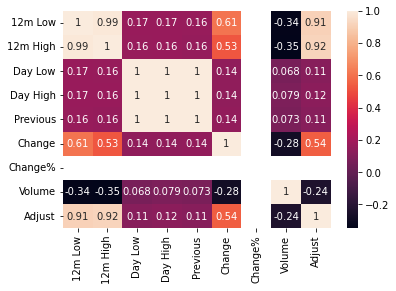

In [41]:
#The correlation matrix with the range from +1 to -1 
#where +1 is highly and positively correlated and -1 will be highly negatively correlated.
sns.heatmap(NSE2014.corr(), annot=True)

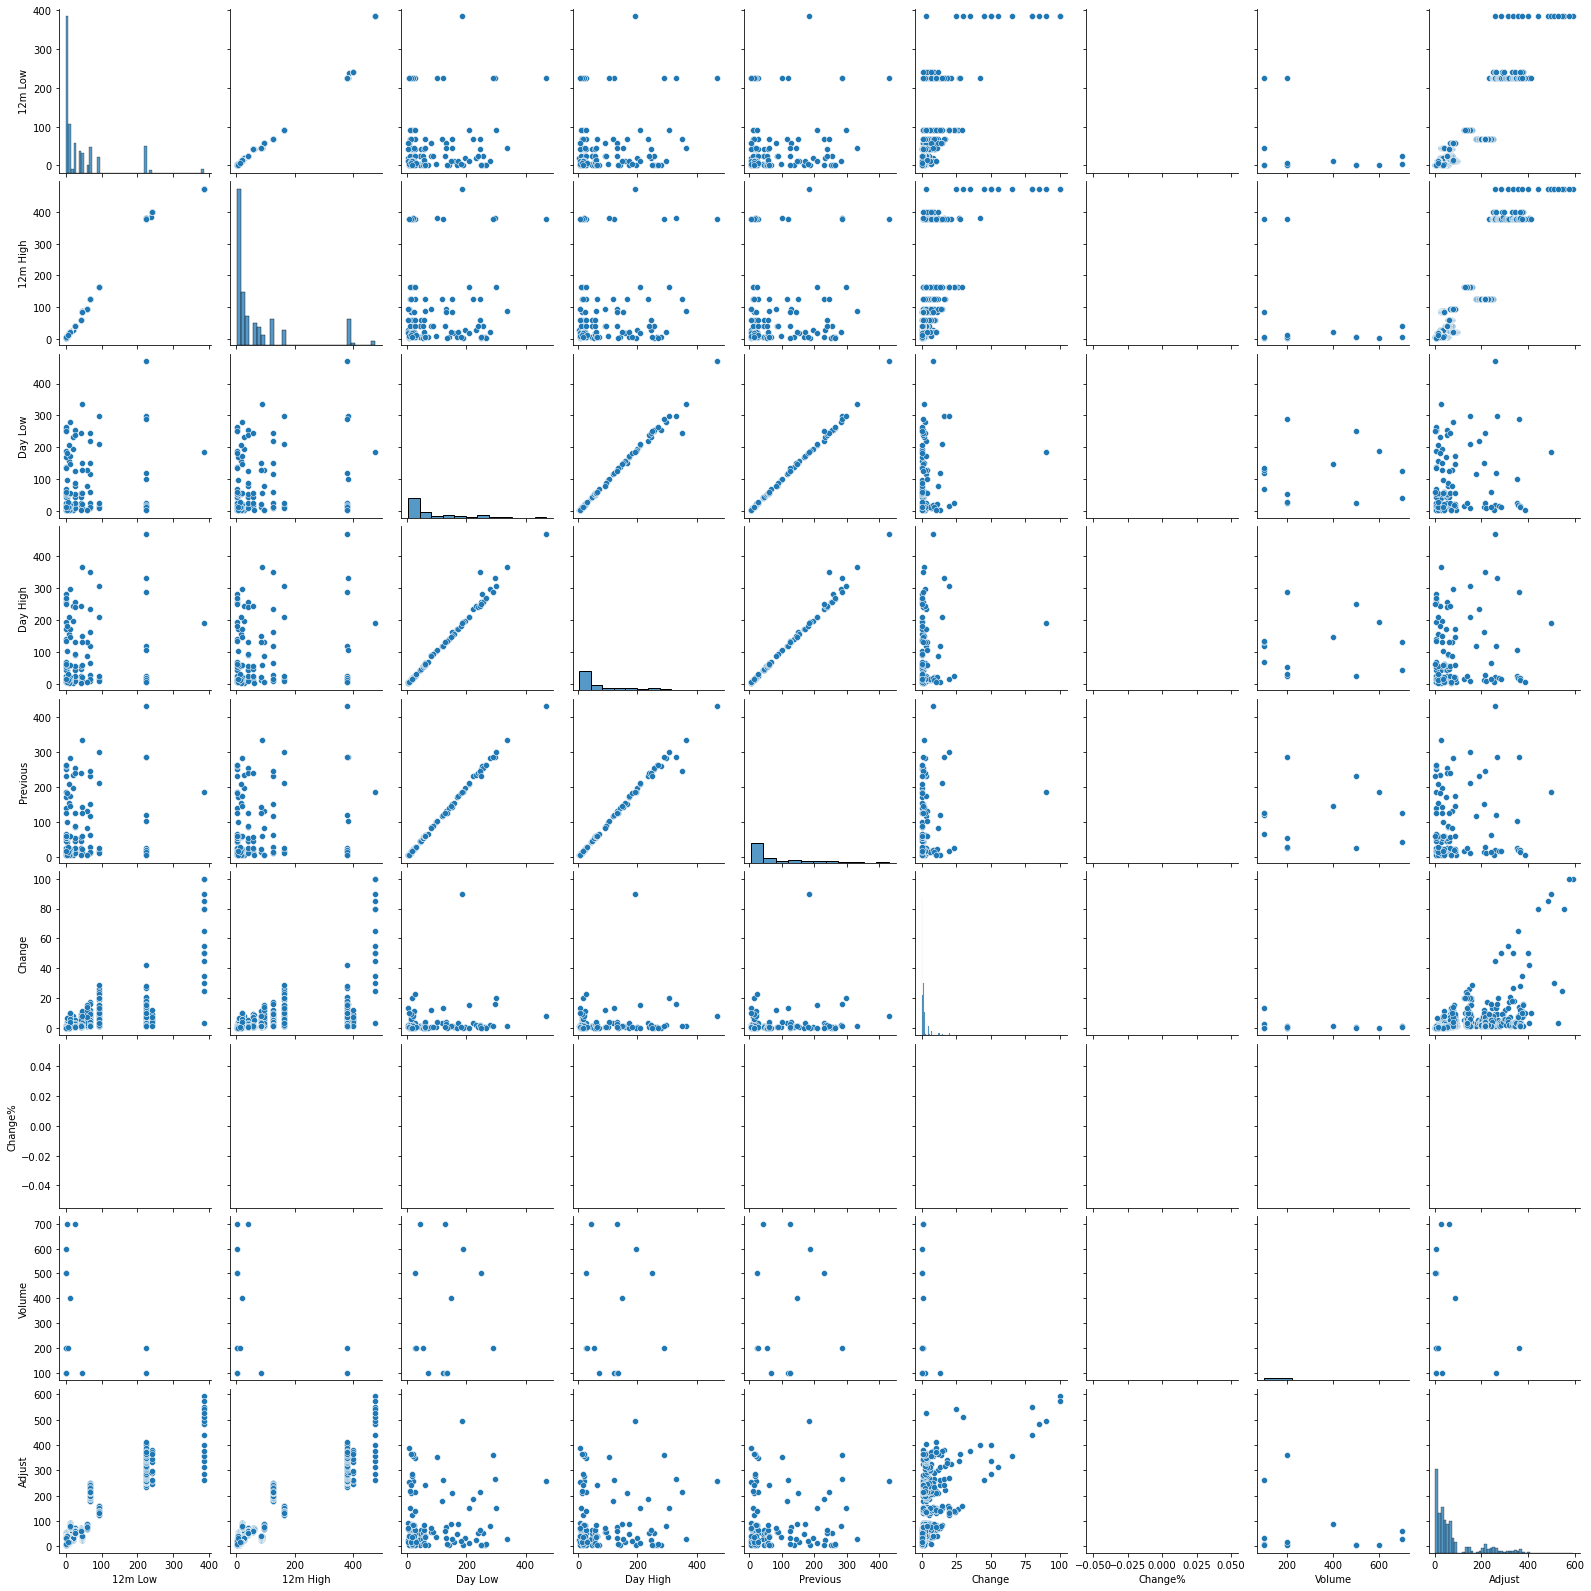

In [42]:
sns.pairplot(NSE2014)

# 2015 NSE DATA STOCK ANALYSIS

In [43]:
#Loading the dataframe
NSE2015.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,2-Jan-15,EGAD,Eaagads Ltd,8.2,14,42,42,42,42,-,-,-,-
1,2-Jan-15,KUKZ,Kakuzi Plc,300,423.5,180,180,180,180,-,-,"5,200",-
2,2-Jan-15,KAPC,Kapchorua Tea Kenya Plc,59,95,137,137,137,137,-,-,-,68.5
3,2-Jan-15,LIMT,Limuru Tea Plc,385,475,771,771,771,771,-,-,-,385.5
4,2-Jan-15,SASN,Sasini Plc,14.8,19.6,13,13,13,12.85,0.15,1.17%,"1,000",-


In [44]:
#Showing how many row and columns in the dataframe: 15696 rows 13 columns
NSE2015.shape

(16386, 13)

In [45]:
# In this it will display  the data type of the all columns in the dataframe
NSE2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16386 entries, 0 to 16385
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DATE       16386 non-null  object
 1   CODE       16386 non-null  object
 2   NAME       16386 non-null  object
 3   12m Low    16386 non-null  object
 4   12m High   16386 non-null  object
 5   Day Low    16386 non-null  object
 6   Day High   16386 non-null  object
 7   Day Price  16386 non-null  object
 8   Previous   16386 non-null  object
 9   Change     16386 non-null  object
 10  Change%    16386 non-null  object
 11  Volume     16386 non-null  object
 12  Adjust     16386 non-null  object
dtypes: object(13)
memory usage: 1.6+ MB


In [46]:
NSE2015["Change"] = NSE2015["Change"].apply(pd.to_numeric)

ValueError: Unable to parse string "-" at position 0

In [47]:
NSE2015.iloc[0]

DATE            2-Jan-15
CODE                EGAD
NAME         Eaagads Ltd
12m Low              8.2
12m High              14
Day Low               42
Day High              42
Day Price             42
Previous              42
Change                 -
Change%                -
Volume                 -
Adjust                 -
Name: 0, dtype: object

In [48]:
NSE2015= NSE2015.replace('^\s*-',np.nan, regex = True)

In [49]:
NSE2015.isnull().sum()

DATE             0
CODE             0
NAME             0
12m Low          0
12m High         0
Day Low          0
Day High         0
Day Price        0
Previous         0
Change       11210
Change%       5361
Volume        3732
Adjust       12791
dtype: int64

In [50]:
NSE2015.dropna(axis = 0 ,inplace = True)
NSE2015.shape #The missing observations are removed

(1161, 13)

In [51]:
#Display the first 5
NSE2015.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
9,2-Jan-15,DTK,Diamond Trust Bank Kenya Ltd,67.75,127,234,239,237,235,2,0.85%,500,215.45
11,2-Jan-15,HFCK,HF Group Ltd,3.49,7.9,46.75,47.5,46.95,45.95,1,2.18%,"15,300",42.68
12,2-Jan-15,IMH,I & M Holdings Plc,43.1,59,125,125,125,123,2,1.63%,"1,500",62.5
15,2-Jan-15,NCBA,NCBA Group Plc,24.9,40,57.5,58.5,57.75,57.5,0.25,0.43%,"35,900",52.5
51,2-Jan-15,NSE,Nairobi Securities Exchange Plc,6.5,13,20.5,21.25,20.9,20.65,0.25,1.21%,"31,200",15.68


In [52]:
NSE2015.dtypes

DATE         object
CODE         object
NAME         object
12m Low      object
12m High     object
Day Low      object
Day High     object
Day Price    object
Previous     object
Change       object
Change%      object
Volume       object
Adjust       object
dtype: object

EXPLORATORY DATA ANALYSIS


In [70]:
#convert points, rebounds, and blocks columns to numeric
NSE2015['12m Low']=NSE2015['12m Low'].astype(float)
NSE2015['12m High']=NSE2015['12m High'].astype(float)
NSE2015['Change']=NSE2015['Change'].astype(float)
NSE2015['Adjust']=NSE2015['Adjust'].astype(float)
NSE2015['Previous'] = pd.to_numeric(NSE2015['Previous'],errors = 'coerce')
NSE2015['Change%'] = pd.to_numeric(NSE2015['Change%'],errors = 'coerce')
NSE2015['Change%'] = pd.to_numeric(NSE2015['Change%'],errors = 'coerce')
NSE2015['Volume'] = pd.to_numeric(NSE2015['Volume'],errors = 'coerce')
NSE2015['Day Low'] = pd.to_numeric(NSE2015['Day Low'],errors = 'coerce')
NSE2015['Day High'] = pd.to_numeric(NSE2015['Day High'],errors = 'coerce')

In [71]:
NSE2015.dtypes

DATE          object
CODE          object
NAME          object
12m Low      float64
12m High     float64
Day Low      float64
Day High     float64
Day Price     object
Previous     float64
Change       float64
Change%      float64
Volume       float64
Adjust       float64
dtype: object

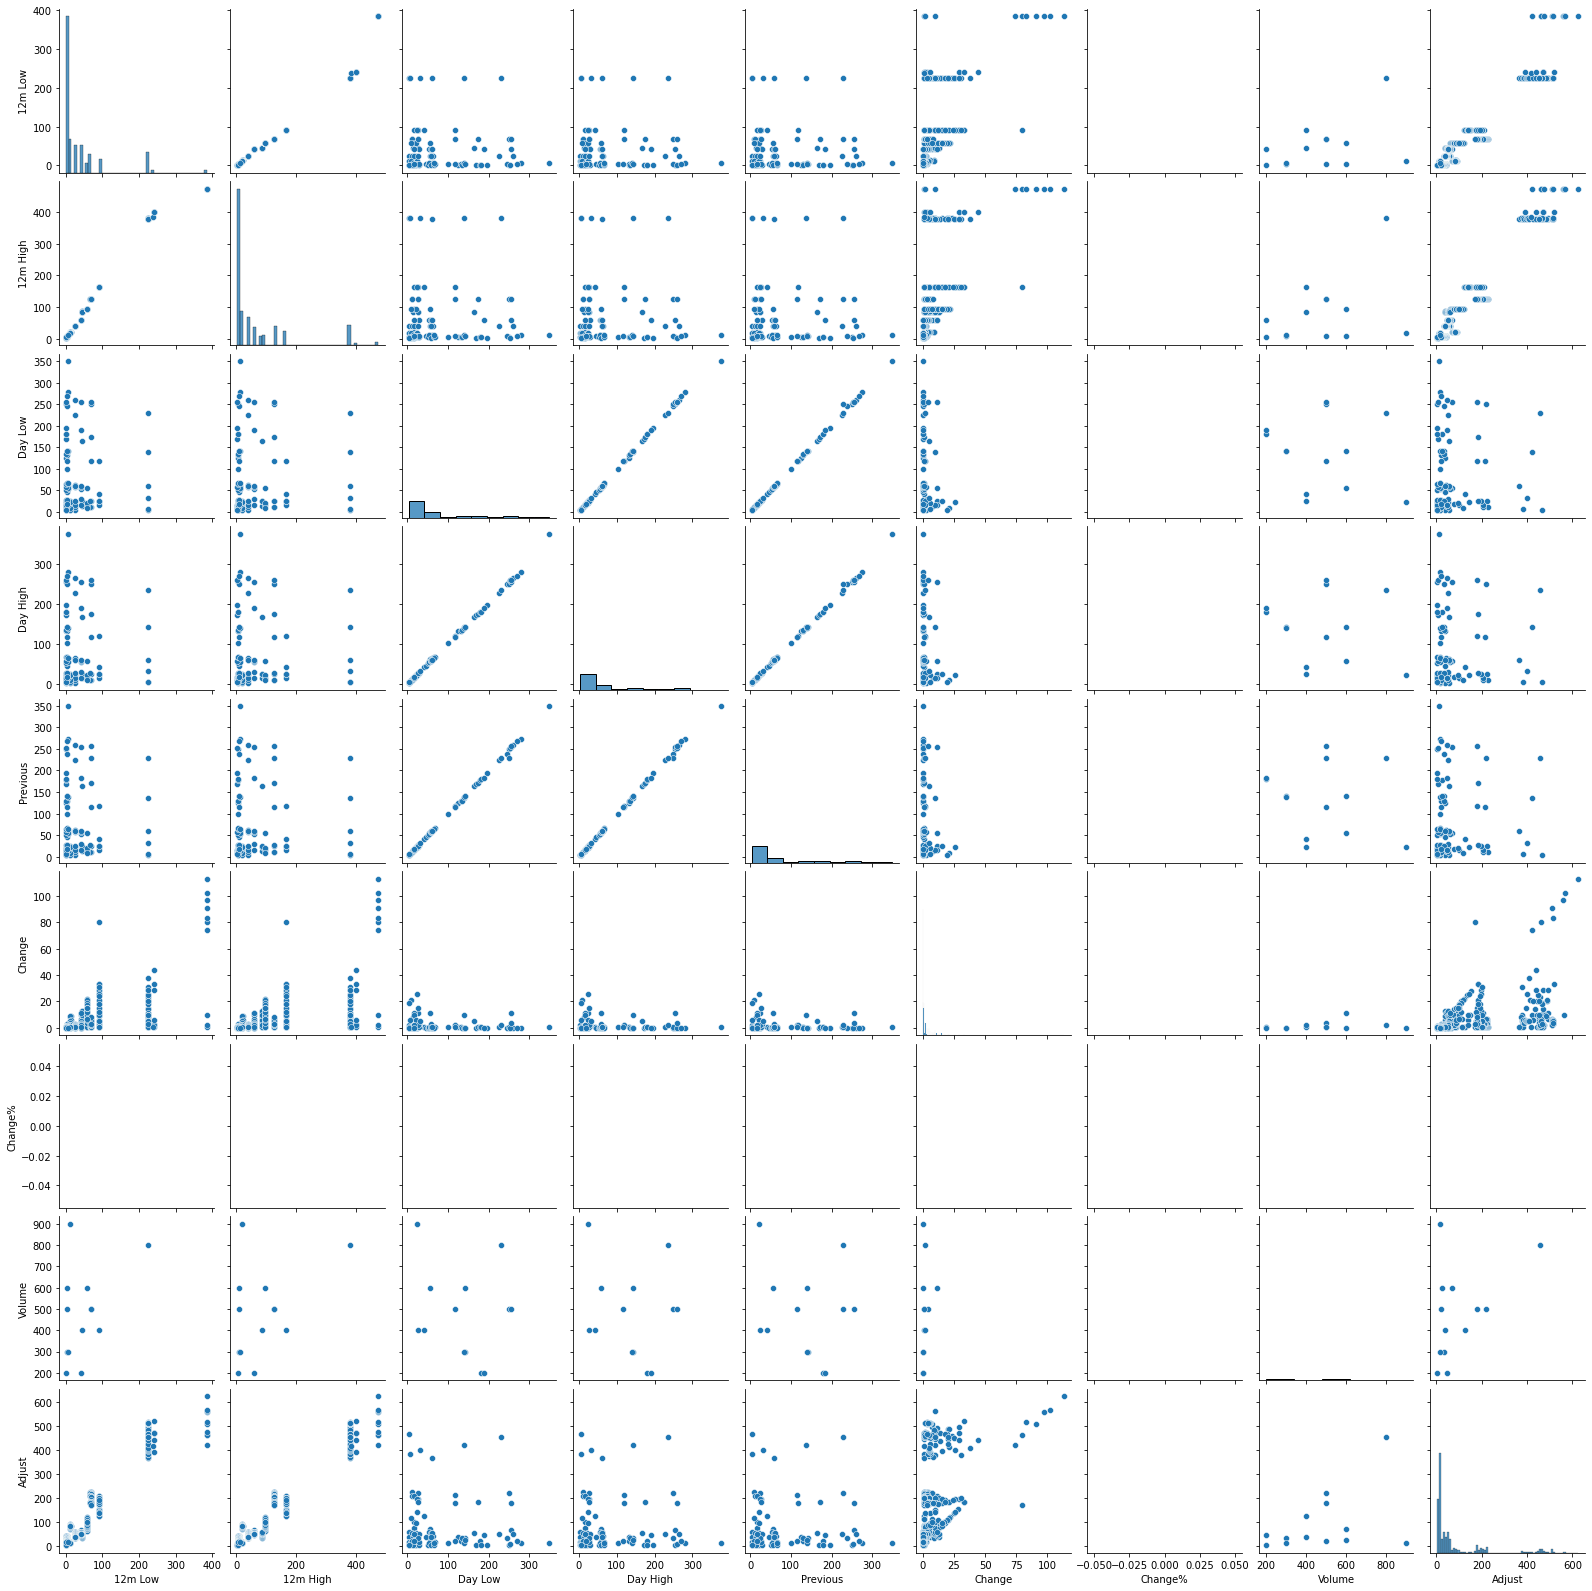

In [55]:
sns.pairplot(NSE2015)


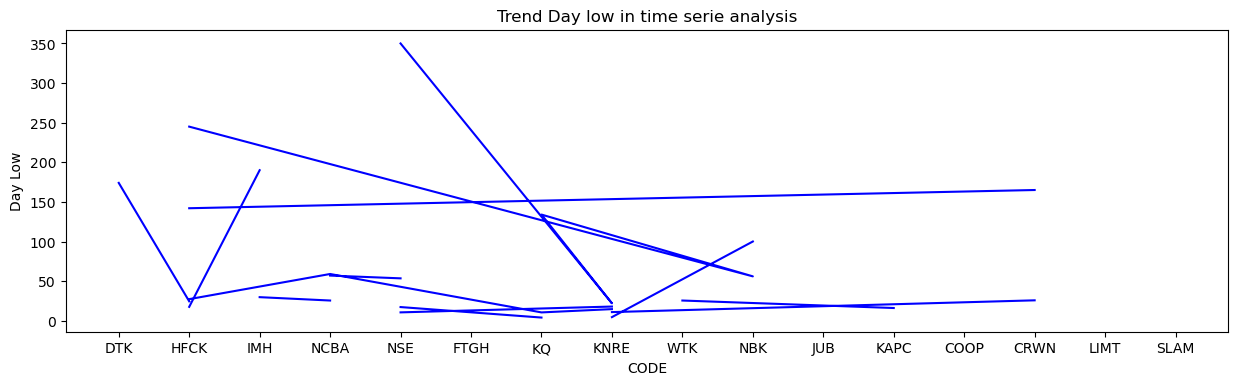

In [60]:
def plot_NSE2015(NSE2015, x, y, title="", xlabel='CODE', ylabel='Day Low', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_NSE2015(NSE2015, x=NSE2015['CODE'], y=NSE2015['Day Low'], title='Trend Day low in time serie analysis')

# 2016 NSE DATA STOCK ANALYSIS

In [61]:
#Loading the dataframe
NSE2016.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,04-Jan-16,EGAD,Eaagads Ltd,8.2,14,25,25,25,26.75,-1.75,6.54%,400,-
1,04-Jan-16,KUKZ,Kakuzi Plc,300,423.5,317,348,332,317,15,4.73%,200,-
2,04-Jan-16,KAPC,Kapchorua Tea Kenya Plc,59,95,200,200,200,200,-,-,800,100
3,04-Jan-16,LIMT,Limuru Tea Plc,385,475,"1,085.00","1,085.00","1,085.00","1,085.00",-,-,-,-
4,04-Jan-16,SASN,Sasini Plc,14.8,19.6,19.5,19.5,19.5,19.55,-0.05,0.26%,700,-


In [62]:
#Showing how many row and columns in the dataframe: 15696 rows 13 columns
NSE2016.shape

(16800, 13)

In [63]:
# In this it will display  the data type of the all columns in the dataframe
NSE2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DATE       16800 non-null  object
 1   CODE       16800 non-null  object
 2   NAME       16800 non-null  object
 3   12m Low    16800 non-null  object
 4   12m High   16800 non-null  object
 5   Day Low    16800 non-null  object
 6   Day High   16800 non-null  object
 7   Day Price  16800 non-null  object
 8   Previous   16800 non-null  object
 9   Change     16800 non-null  object
 10  Change%    16800 non-null  object
 11  Volume     16800 non-null  object
 12  Adjust     16800 non-null  object
dtypes: object(13)
memory usage: 1.7+ MB


In [64]:
NSE2016["Change"] = NSE2016["Change"].apply(pd.to_numeric)

ValueError: Unable to parse string "-" at position 0

In [65]:
NSE2016.iloc[0]

DATE           04-Jan-16
CODE                EGAD
NAME         Eaagads Ltd
12m Low              8.2
12m High              14
Day Low               25
Day High              25
Day Price             25
Previous           26.75
Change             -1.75
Change%            6.54%
Volume               400
Adjust                 -
Name: 0, dtype: object

In [66]:
NSE2016= NSE2016.replace('^\s*-',np.nan, regex = True)

In [67]:
NSE2016.isnull().sum()

DATE             0
CODE             0
NAME             0
12m Low          0
12m High         0
Day Low          0
Day High         0
Day Price        0
Previous         1
Change       11733
Change%       5966
Volume        4373
Adjust       14355
dtype: int64

In [68]:
NSE2016.dropna(axis = 0 ,inplace = True)
NSE2016.shape #The missing observations are removed

(870, 13)

In [69]:
#Display the first 5
NSE2016.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
5,04-Jan-16,WTK,Williamson Tea Kenya Plc,92,165,400,410,401,384,17,4.43%,700,200.5
11,04-Jan-16,HFCK,HF Group Ltd,3.49,7.9,22.5,23,22.85,22.25,0.6,2.70%,"11,800",20.77
14,04-Jan-16,NBK,National Bank of Kenya Ltd,3.4,4.38,15.1,16,15.8,15.75,0.05,0.32%,"6,200",14.36
20,04-Jan-16,KQ,Kenya Airways Plc,0.8,5.5,4.75,5,4.95,4.9,0.05,1.02%,"76,400",19.8
69,05-Jan-16,KAPC,Kapchorua Tea Kenya Plc,59,95,200,220,205,200,5,2.50%,"2,000",102.5


In [72]:
NSE2016.dtypes

DATE         object
CODE         object
NAME         object
12m Low      object
12m High     object
Day Low      object
Day High     object
Day Price    object
Previous     object
Change       object
Change%      object
Volume       object
Adjust       object
dtype: object

In [73]:
#convert points, rebounds, and blocks columns to numeric
NSE2016['12m Low']=NSE2016['12m Low'].astype(float)
NSE2016['12m High']=NSE2016['12m High'].astype(float)
NSE2016['Change']=NSE2016['Change'].astype(float)
NSE2016['Adjust']=NSE2016['Adjust'].astype(float)
NSE2016['Previous'] = pd.to_numeric(NSE2016['Previous'],errors = 'coerce')
NSE2016['Change%'] = pd.to_numeric(NSE2016['Change%'],errors = 'coerce')
NSE2016['Change%'] = pd.to_numeric(NSE2016['Change%'],errors = 'coerce')
NSE2016['Volume'] = pd.to_numeric(NSE2016['Volume'],errors = 'coerce')
NSE2016['Day Low'] = pd.to_numeric(NSE2016['Day Low'],errors = 'coerce')
NSE2016['Day High'] = pd.to_numeric(NSE2016['Day High'],errors = 'coerce')

In [74]:
NSE2016.dtypes

DATE          object
CODE          object
NAME          object
12m Low      float64
12m High     float64
Day Low      float64
Day High     float64
Day Price     object
Previous     float64
Change       float64
Change%      float64
Volume       float64
Adjust       float64
dtype: object

<AxesSubplot:>

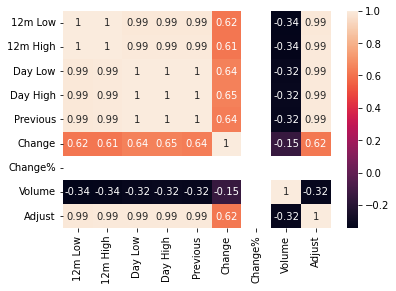

In [75]:
#The correlation matrix with the range from +1 to -1 
#where +1 is highly and positively correlated and -1 will be highly negatively correlated.
sns.heatmap(NSE2016.corr(), annot=True)

# 2017 NSE DATA ANALYSIS

In [76]:
#Loading the dataframe
NSE2017.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,03-Jan-17,EGAD,Eaagads Ltd,8.2,14,27.25,28,27.75,27.25,0.5,1.83%,"3,500",-
1,03-Jan-17,KUKZ,Kakuzi Plc,300,423.5,280,280,280,309,-29,9.39%,200,-
2,03-Jan-17,KAPC,Kapchorua Tea Kenya Plc,59,95,80,80,80,80,-,-,-,-
3,03-Jan-17,LIMT,Limuru Tea Plc,385,475,530,530,530,530,-,-,100,-
4,03-Jan-17,SASN,Sasini Plc,14.8,19.6,19.2,21,19.9,19.2,0.7,3.65%,"4,900",-


In [77]:
# In this it will display  the data type of the all columns in the dataframe
NSE2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16981 entries, 0 to 16980
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DATE       16981 non-null  object
 1   CODE       16981 non-null  object
 2   NAME       16981 non-null  object
 3   12m Low    16981 non-null  object
 4   12m High   16981 non-null  object
 5   Day Low    16981 non-null  object
 6   Day High   16981 non-null  object
 7   Day Price  16981 non-null  object
 8   Previous   16981 non-null  object
 9   Change     16981 non-null  object
 10  Change%    16981 non-null  object
 11  Volume     16981 non-null  object
 12  Adjust     16981 non-null  object
dtypes: object(13)
memory usage: 1.7+ MB


In [78]:
NSE2017["Change"] = NSE2017["Change"].apply(pd.to_numeric)

ValueError: Unable to parse string "-" at position 0

In [79]:
NSE2017.iloc[0]

DATE           03-Jan-17
CODE                EGAD
NAME         Eaagads Ltd
12m Low              8.2
12m High              14
Day Low            27.25
Day High              28
Day Price          27.75
Previous           27.25
Change               0.5
Change%            1.83%
Volume             3,500
Adjust                 -
Name: 0, dtype: object

In [80]:
NSE2017= NSE2017.replace('^\s*-',np.nan, regex = True)

In [81]:
NSE2017.isnull().sum()

DATE             0
CODE             0
NAME             0
12m Low          0
12m High         0
Day Low          0
Day High         0
Day Price        0
Previous         1
Change       11713
Change%       6597
Volume        4664
Adjust       15350
dtype: int64

In [82]:
NSE2017.dropna(axis = 0 ,inplace = True)
NSE2017.shape #The missing observations are removed

(603, 13)

In [83]:
#Display the first 5
NSE2017.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
14,03-Jan-17,NBK,National Bank of Kenya Ltd,3.4,4.33,7.5,7.5,7.5,7.2,0.3,4.17%,"13,000",6.82
45,03-Jan-17,KNRE,Kenya Re-Insurance Corporation Ltd,2,4.36,21.75,23,22.7,22.5,0.2,0.89%,"58,900",5.68
77,04-Jan-17,COOP,Co-operative Bank of Kenya Ltd,10.5,17,13.05,13.5,13.45,13,0.45,3.46%,"3,007,100",11.21
81,04-Jan-17,IMH,I & M Holdings Plc,43.1,59,89.5,90,89.5,88.25,1.25,1.42%,"27,100",44.75
114,04-Jan-17,KNRE,Kenya Re-Insurance Corporation Ltd,2,4.36,22.5,24.5,22.75,22.7,0.05,0.22%,"605,300",5.69


In [84]:
NSE2017.dtypes

DATE         object
CODE         object
NAME         object
12m Low      object
12m High     object
Day Low      object
Day High     object
Day Price    object
Previous     object
Change       object
Change%      object
Volume       object
Adjust       object
dtype: object

In [86]:
#convert points, rebounds, and blocks columns to numeric
NSE2017['12m Low']=NSE2017['12m Low'].astype(float)
NSE2017['12m High']=NSE2017['12m High'].astype(float)
NSE2017['Change']=NSE2017['Change'].astype(float)
NSE2017['Adjust']=NSE2017['Adjust'].astype(float)
NSE2017['Previous'] = pd.to_numeric(NSE2017['Previous'],errors = 'coerce')
NSE2017['Change%'] = pd.to_numeric(NSE2017['Change%'],errors = 'coerce')
NSE2017['Change%'] = pd.to_numeric(NSE2017['Change%'],errors = 'coerce')
NSE2017['Volume'] = pd.to_numeric(NSE2017['Volume'],errors = 'coerce')
NSE2017['Day Low'] = pd.to_numeric(NSE2017['Day Low'],errors = 'coerce')
NSE2017['Day High'] = pd.to_numeric(NSE2017['Day High'],errors = 'coerce')

In [87]:
NSE2017.dtypes

DATE          object
CODE          object
NAME          object
12m Low      float64
12m High     float64
Day Low      float64
Day High     float64
Day Price     object
Previous     float64
Change       float64
Change%      float64
Volume       float64
Adjust       float64
dtype: object

<AxesSubplot:>

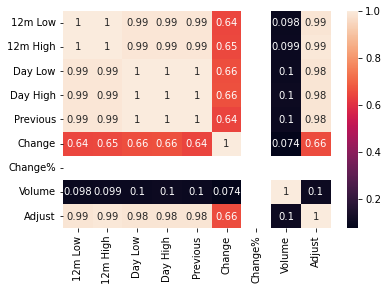

In [88]:
#The correlation matrix with the range from +1 to -1 
#where +1 is highly and positively correlated and -1 will be highly negatively correlated.
sns.heatmap(NSE2017.corr(), annot=True)

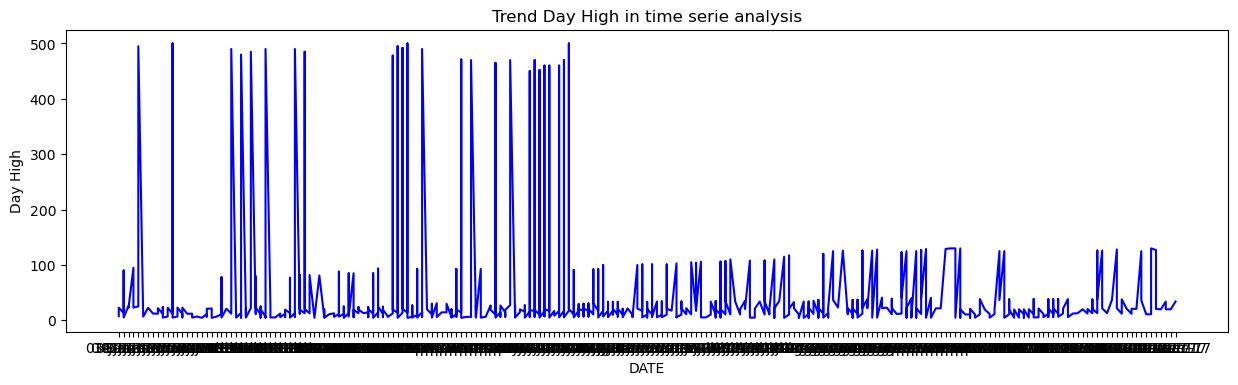

In [163]:
def plot_NSE2017(NSE2017, x, y, title="", xlabel='DATE', ylabel='Day High', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_NSE2017(NSE2017, x=NSE2017['DATE'], y=NSE2017['Day High'], title='Trend Day High in time serie analysis')

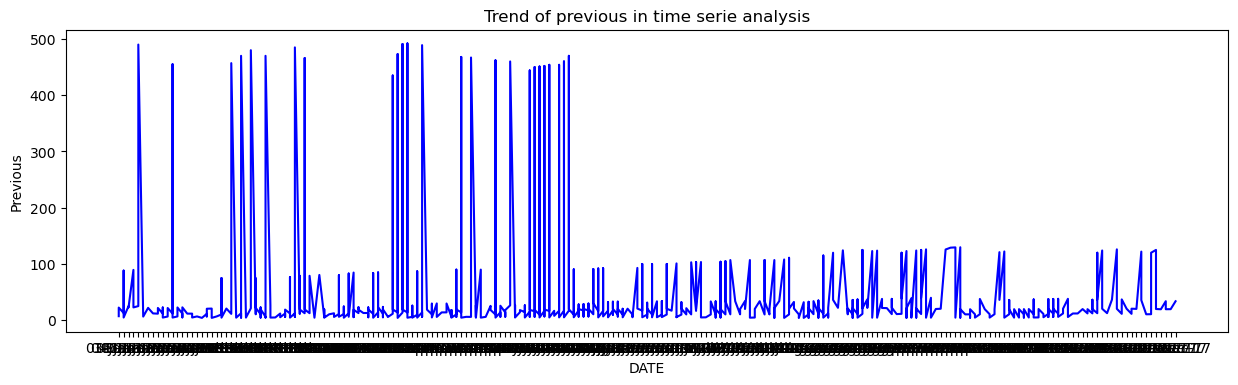

In [162]:
def plot_NSE2017(NSE2017, x, y, title="", xlabel='DATE', ylabel='Previous', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_NSE2017(NSE2017, x=NSE2017['DATE'], y=NSE2017['Previous'], title='Trend of previous in time serie analysis')

# 2018 NSE DATA ANALYSIS

In [89]:
#Loading the dataframe
NSE2018.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,02-Jan-18,EGAD,Eaagads Ltd,8.2,14,25,25,25,22.75,2.25,9.89%,"10,500",-
1,02-Jan-18,KUKZ,Kakuzi Plc,300,423.5,329,329,329,329,-,-,-,-
2,02-Jan-18,KAPC,Kapchorua Tea Kenya Plc,59,95,67.5,70,67.5,65.5,2,3.05%,"1,000",-
3,02-Jan-18,LIMT,Limuru Tea Plc,385,475,500,500,500,500,-,-,-,-
4,02-Jan-18,SASN,Sasini Plc,14.8,19.6,27,27.5,27,29.5,-2.5,8.47%,300,-


In [90]:
# In this it will display  the data type of the all columns in the dataframe
NSE2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17651 entries, 0 to 17650
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DATE       17650 non-null  object
 1   CODE       17650 non-null  object
 2   NAME       17650 non-null  object
 3   12m Low    17650 non-null  object
 4   12m High   17650 non-null  object
 5   Day Low    17650 non-null  object
 6   Day High   17650 non-null  object
 7   Day Price  17650 non-null  object
 8   Previous   17650 non-null  object
 9   Change     17650 non-null  object
 10  Change%    17650 non-null  object
 11  Volume     17650 non-null  object
 12  Adjust     17650 non-null  object
dtypes: object(13)
memory usage: 1.8+ MB


In [91]:
NSE2018["Change"] = NSE2018["Change"].apply(pd.to_numeric)

ValueError: Unable to parse string "-" at position 0

In [92]:
NSE2018.iloc[0]

DATE           02-Jan-18
CODE                EGAD
NAME         Eaagads Ltd
12m Low              8.2
12m High              14
Day Low               25
Day High              25
Day Price             25
Previous           22.75
Change              2.25
Change%            9.89%
Volume            10,500
Adjust                 -
Name: 0, dtype: object

In [93]:
NSE2018= NSE2018.replace('^\s*-',np.nan, regex = True)

In [94]:
NSE2018.isnull().sum()

DATE             1
CODE             1
NAME             1
12m Low          1
12m High         1
Day Low          1
Day High         1
Day Price        1
Previous         2
Change       12690
Change%       6939
Volume        4986
Adjust       16986
dtype: int64

In [95]:
NSE2018.dropna(axis = 0 ,inplace = True)
NSE2018.shape #The missing observations are removed

(213, 13)

In [96]:
#Display the first 5
NSE2018.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
15,02-Jan-18,NCBA,NCBA Group Plc,24.9,40,34,34,34,33.95,0.05,0.15%,"194,100",30.91
45,02-Jan-18,KNRE,Kenya Re-Insurance Corporation Ltd,2,4.36,18.65,19.5,18.95,18.1,0.85,4.70%,"11,300",4.74
111,03-Jan-18,KNRE,Kenya Re-Insurance Corporation Ltd,2,4.36,19,19.5,19,18.95,0.05,0.26%,"3,100",4.75
150,04-Jan-18,NCBA,NCBA Group Plc,24.9,40,35.5,36.75,36.25,34,2.25,6.62%,"39,800",32.95
180,04-Jan-18,KNRE,Kenya Re-Insurance Corporation Ltd,2,4.36,18.95,19.5,19.4,19,0.4,2.11%,"1,341,400",4.85


In [97]:
NSE2018.dtypes

DATE         object
CODE         object
NAME         object
12m Low      object
12m High     object
Day Low      object
Day High     object
Day Price    object
Previous     object
Change       object
Change%      object
Volume       object
Adjust       object
dtype: object

In [98]:
#convert points, rebounds, and blocks columns to numeric
NSE2018['12m Low']=NSE2018['12m Low'].astype(float)
NSE2018['12m High']=NSE2018['12m High'].astype(float)
NSE2018['Change']=NSE2018['Change'].astype(float)
NSE2018['Adjust']=NSE2018['Adjust'].astype(float)
NSE2018['Previous'] = pd.to_numeric(NSE2018['Previous'],errors = 'coerce')
NSE2018['Change%'] = pd.to_numeric(NSE2018['Change%'],errors = 'coerce')
NSE2018['Change%'] = pd.to_numeric(NSE2018['Change%'],errors = 'coerce')
NSE2018['Volume'] = pd.to_numeric(NSE2018['Volume'],errors = 'coerce')
NSE2018['Day Low'] = pd.to_numeric(NSE2018['Day Low'],errors = 'coerce')
NSE2018['Day High'] = pd.to_numeric(NSE2018['Day High'],errors = 'coerce')

In [99]:
NSE2018.dtypes

DATE          object
CODE          object
NAME          object
12m Low      float64
12m High     float64
Day Low      float64
Day High     float64
Day Price     object
Previous     float64
Change       float64
Change%      float64
Volume       float64
Adjust       float64
dtype: object

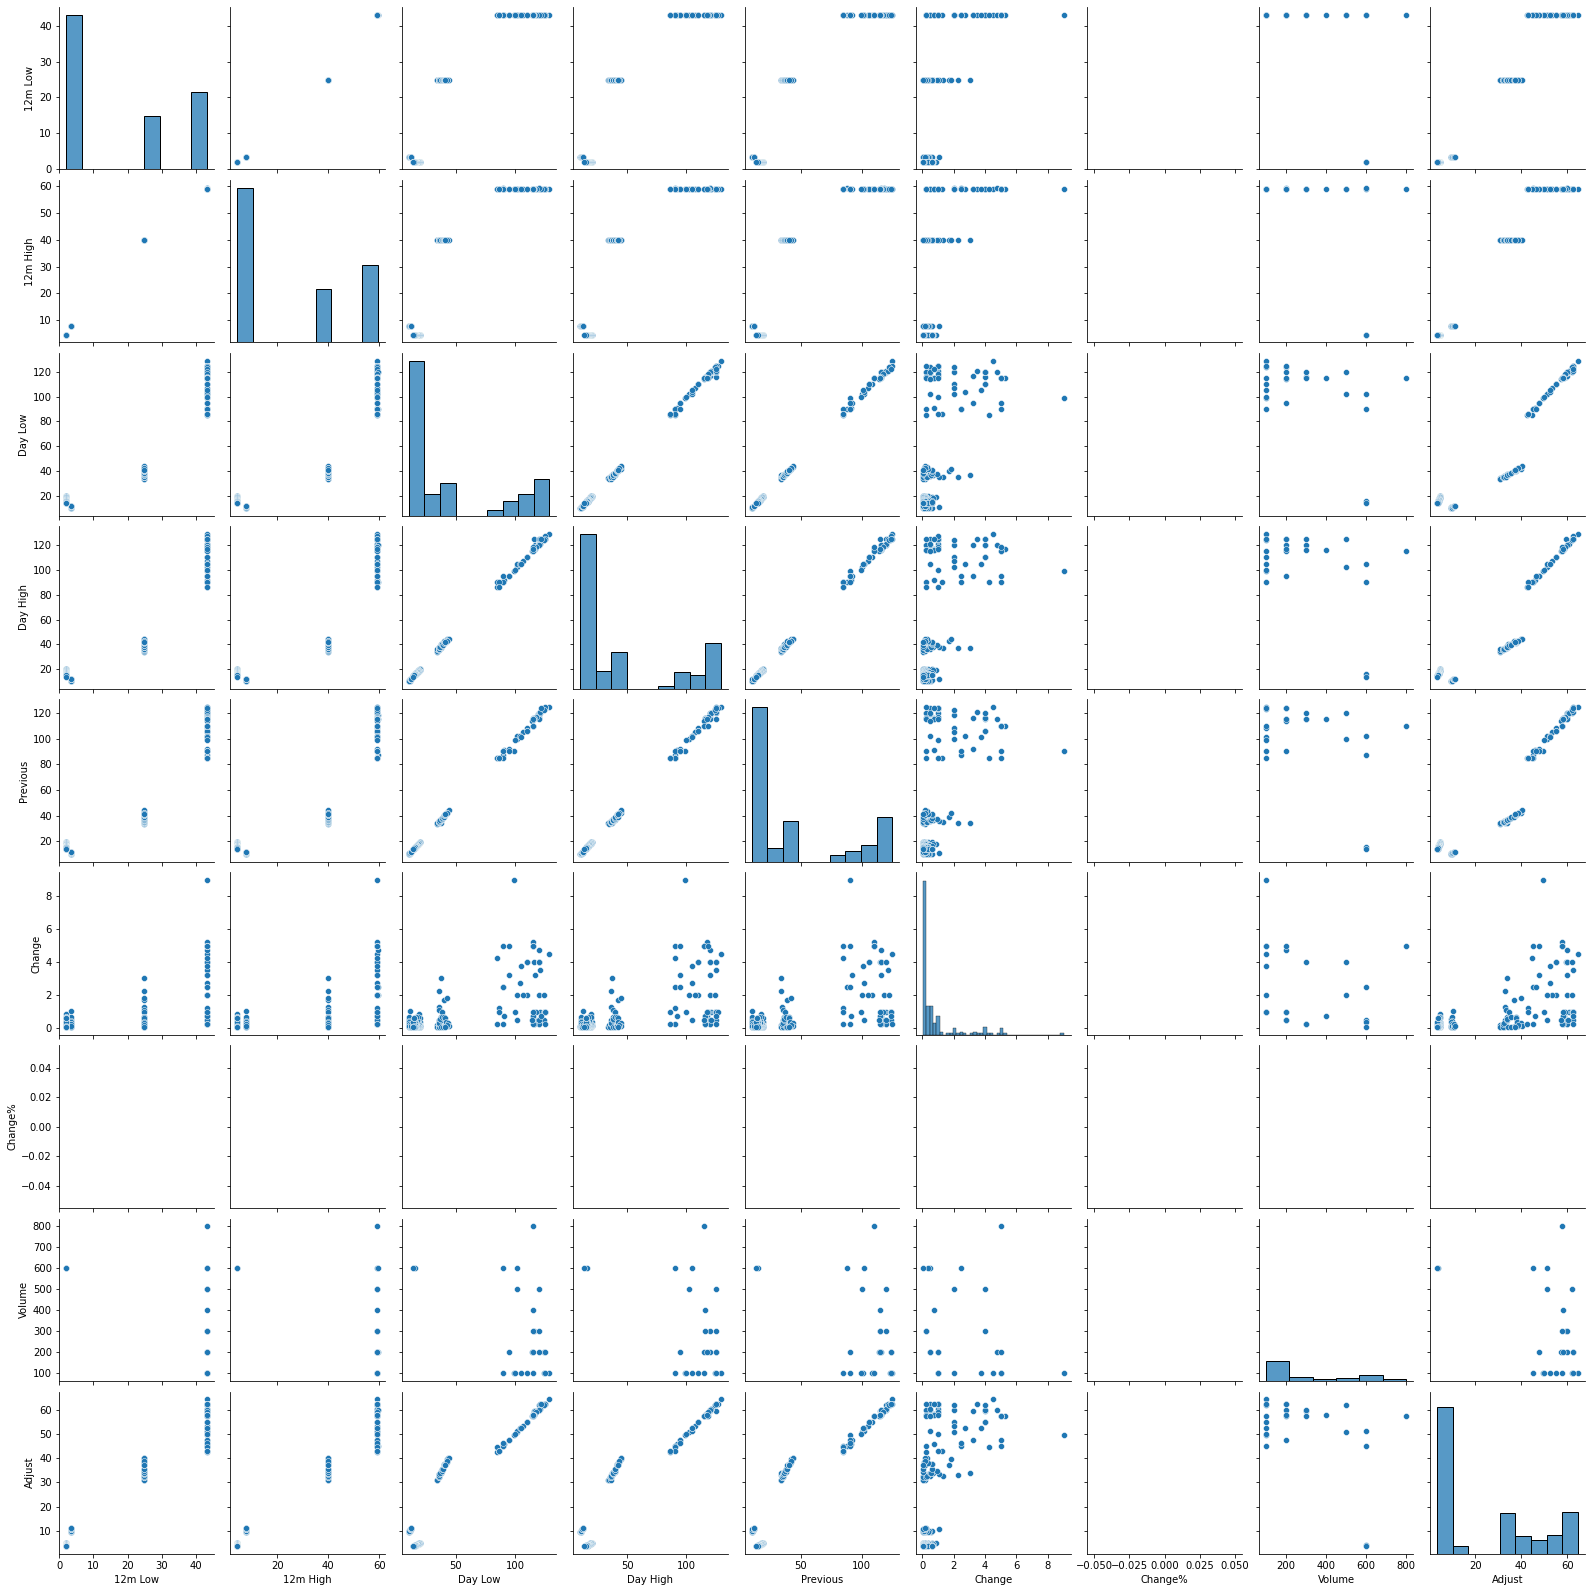

In [101]:
sns.pairplot(NSE2018)

Text(0.5, 1.0, 'Day Price detrended by subtracting the least squares fit')

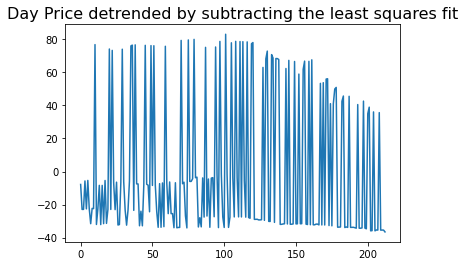

In [102]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(NSE2018['Day Price'].values)
plt.plot(detrended)
plt.title('Day Price detrended by subtracting the least squares fit', fontsize=16)

detrending a time series means to remove the trend component from the time serie

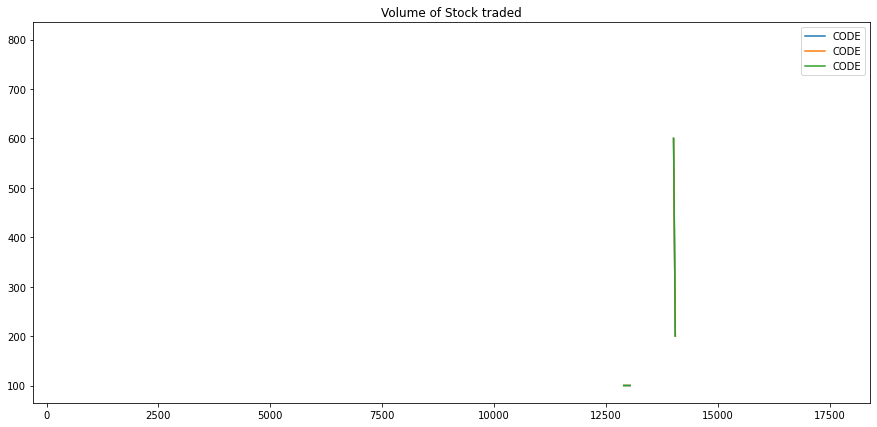

In [107]:
NSE2018['Volume'].plot(label = 'CODE', figsize = (15,7))
NSE2018['Volume'].plot(label = "CODE")
NSE2018['Volume'].plot(label = 'CODE')
plt.title('Volume of Stock traded')
plt.legend()

# 2019 NSE DATA ANALYSIS

In [108]:
#Loading the dataframe
NSE2019.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,02-Jan-19,EGAD,Eaagads Ltd,8.2,14,14.5,14.5,14.5,14.5,-,-,-,-
1,02-Jan-19,KUKZ,Kakuzi Plc,300,423.5,310,310,310,310,-,-,-,-
2,02-Jan-19,KAPC,Kapchorua Tea Kenya Plc,59,95,74.5,74.5,74.5,75,-0.5,0.67%,200,-
3,02-Jan-19,LIMT,Limuru Tea Plc,385,475,500,500,500,500,-,-,-,-
4,02-Jan-19,SASN,Sasini Plc,14.8,19,19,21,19.8,19.9,-0.1,0.50%,"1,000",-


In [109]:
# In this it will display  the data type of the all columns in the dataframe
NSE2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18147 entries, 0 to 18146
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DATE       18147 non-null  object
 1   CODE       18147 non-null  object
 2   NAME       18147 non-null  object
 3   12m Low    18147 non-null  object
 4   12m High   18147 non-null  object
 5   Day Low    18147 non-null  object
 6   Day High   18147 non-null  object
 7   Day Price  18147 non-null  object
 8   Previous   18147 non-null  object
 9   Change     18147 non-null  object
 10  Change%    18147 non-null  object
 11  Volume     18147 non-null  object
 12  Adjust     18147 non-null  object
dtypes: object(13)
memory usage: 1.8+ MB


In [110]:
NSE2019["Change"] = NSE2019["Change"].apply(pd.to_numeric)

ValueError: Unable to parse string "-" at position 0

In [111]:
NSE2019.iloc[0]

DATE           02-Jan-19
CODE                EGAD
NAME         Eaagads Ltd
12m Low              8.2
12m High              14
Day Low             14.5
Day High            14.5
Day Price           14.5
Previous            14.5
Change                 -
Change%                -
Volume                 -
Adjust                 -
Name: 0, dtype: object

In [112]:
NSE2019= NSE2019.replace('^\s*-',np.nan, regex = True)

In [113]:
NSE2019.isnull().sum()

DATE             0
CODE             0
NAME             0
12m Low          0
12m High         0
Day Low          1
Day High         1
Day Price        1
Previous         0
Change       12614
Change%       6854
Volume        6460
Adjust       17943
dtype: int64

In [114]:
NSE2019.dropna(axis = 0 ,inplace = True)
NSE2019.shape #The missing observations are removed

(71, 13)

In [115]:
#Display the first 5
NSE2019.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
86,03-Jan-19,IMH,I & M Holdings Plc,43.1,59,90,92,90.5,85,5.5,6.47%,"12,000",45.25
119,03-Jan-19,KNRE,Kenya Re-Insurance Corporation Ltd,2,4.36,13.8,14.5,14,13.9,0.1,0.72%,"16,700",3.5
192,04-Jan-19,KNRE,Kenya Re-Insurance Corporation Ltd,2,4.36,13.8,14.5,14.4,14,0.4,2.86%,"6,800",3.6
232,07-Jan-19,IMH,I & M Holdings Plc,43.1,59,91,91,91,90.5,0.5,0.55%,"2,000",45.5
630,14-Jan-19,KNRE,Kenya Re-Insurance Corporation Ltd,2,4.36,13.85,14.6,14.05,13.85,0.2,1.44%,"20,100",3.51


In [116]:
NSE2019.dtypes

DATE         object
CODE         object
NAME         object
12m Low      object
12m High     object
Day Low      object
Day High     object
Day Price    object
Previous     object
Change       object
Change%      object
Volume       object
Adjust       object
dtype: object

In [117]:
#convert points, rebounds, and blocks columns to numeric
NSE2019['12m Low']=NSE2019['12m Low'].astype(float)
NSE2019['12m High']=NSE2019['12m High'].astype(float)
NSE2019['Change']=NSE2019['Change'].astype(float)
NSE2019['Adjust']=NSE2019['Adjust'].astype(float)
NSE2019['Previous'] = pd.to_numeric(NSE2019['Previous'],errors = 'coerce')
NSE2019['Change%'] = pd.to_numeric(NSE2019['Change%'],errors = 'coerce')
NSE2019['Change%'] = pd.to_numeric(NSE2019['Change%'],errors = 'coerce')
NSE2019['Volume'] = pd.to_numeric(NSE2019['Volume'],errors = 'coerce')
NSE2019['Day Low'] = pd.to_numeric(NSE2019['Day Low'],errors = 'coerce')
NSE2019['Day High'] = pd.to_numeric(NSE2019['Day High'],errors = 'coerce')

In [118]:
NSE2019.dtypes

DATE          object
CODE          object
NAME          object
12m Low      float64
12m High     float64
Day Low      float64
Day High     float64
Day Price     object
Previous     float64
Change       float64
Change%      float64
Volume       float64
Adjust       float64
dtype: object

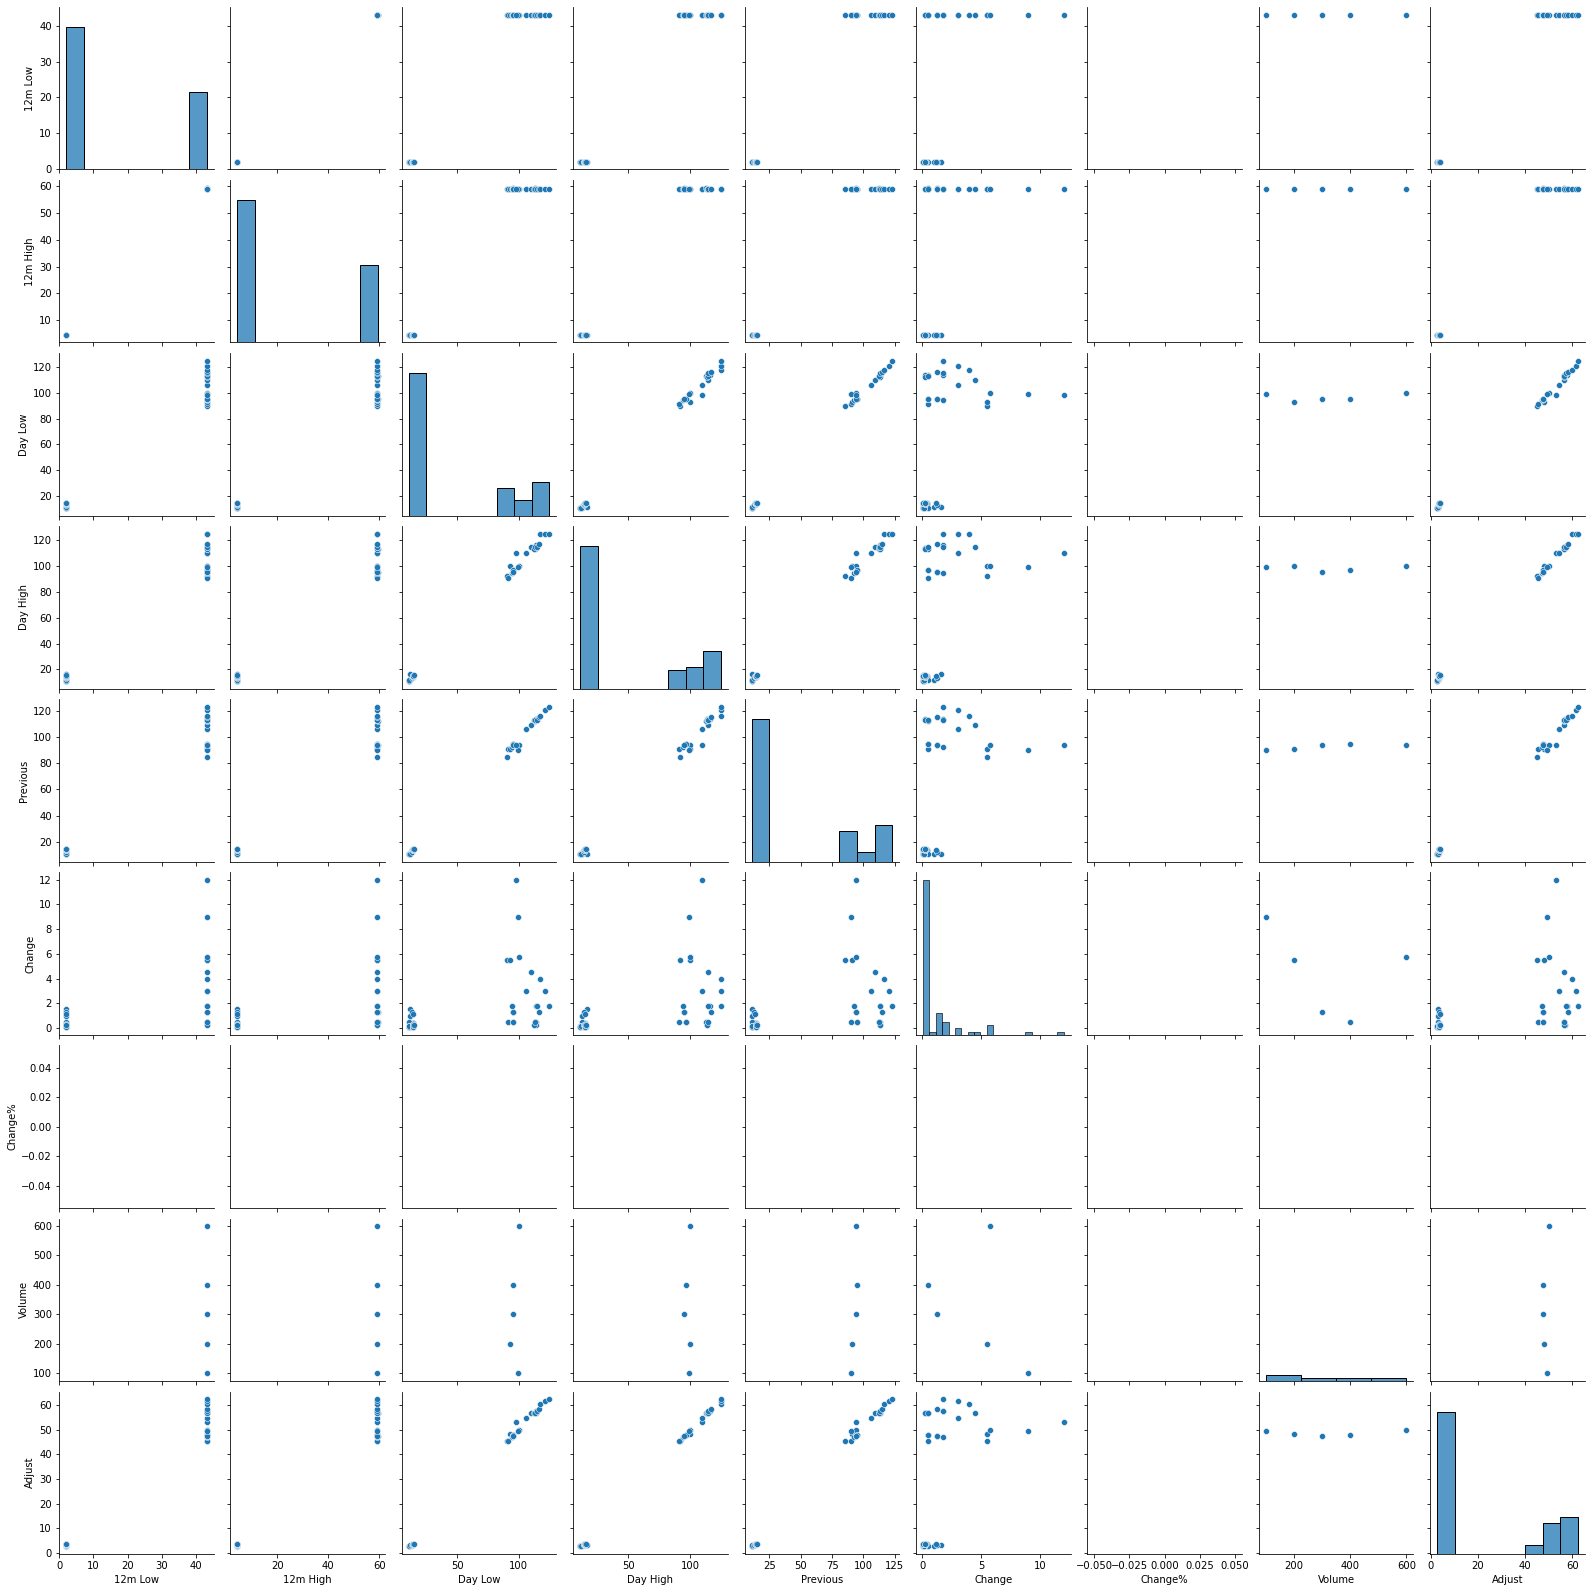

In [119]:
sns.pairplot(NSE2019)

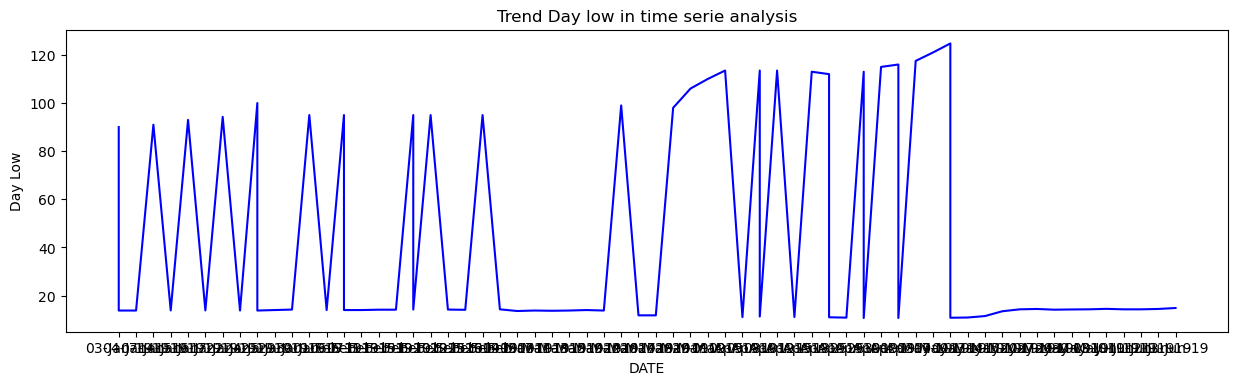

In [153]:
def plot_NSE2019(NSE2019, x, y, title="", xlabel='DATE', ylabel='Day Low', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_NSE2019(NSE2019, x=NSE2019['DATE'], y=NSE2019['Day Low'], title='Trend Day low in time serie analysis')

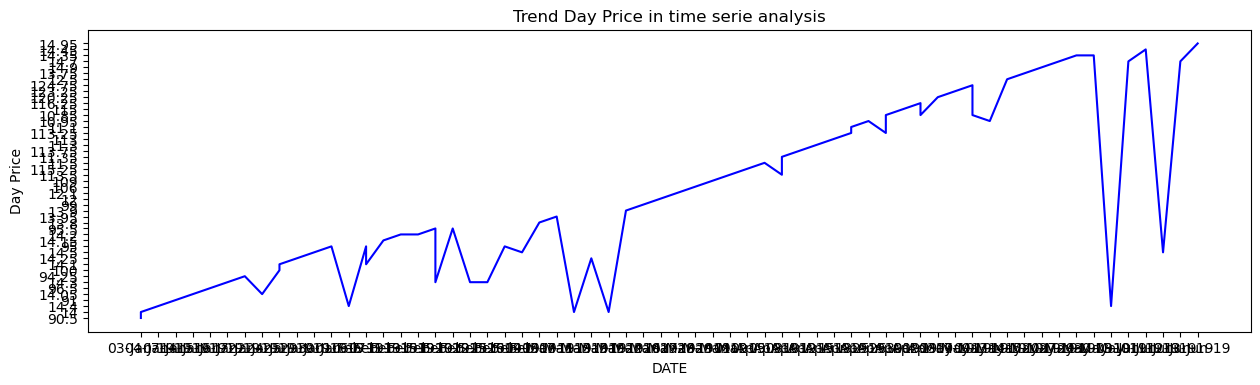

In [154]:
def plot_NSE2019(NSE2019, x, y, title="", xlabel='DATE', ylabel='Day Price', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_NSE2019(NSE2019, x=NSE2019['DATE'], y=NSE2019['Day Price'], title='Trend Day Price in time serie analysis')

# 2020 NSE DATA ANALYSIS

In [120]:
#Loading the dataframe
NSE2020.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,02-Jan-20,EGAD,Eaagads Ltd,8.2,14,10.1,10.1,10.1,10.1,-,-,-,-
1,02-Jan-20,KUKZ,Kakuzi Plc,300,423.5,340,340,340,340,-,-,-,-
2,02-Jan-20,KAPC,Kapchorua Tea Kenya Plc,59,95,80,80,80,80,-,-,-,-
3,02-Jan-20,LIMT,Limuru Tea Plc,385,475,450,450,450,450,-,-,-,-
4,02-Jan-20,SASN,Sasini Plc,14.8,19.6,16.15,16.15,16.15,16.9,-0.75,4.44%,300,-


In [121]:
# In this it will display  the data type of the all columns in the dataframe
NSE2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17892 entries, 0 to 17891
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DATE       17892 non-null  object
 1   CODE       17892 non-null  object
 2   NAME       17892 non-null  object
 3   12m Low    17892 non-null  object
 4   12m High   17892 non-null  object
 5   Day Low    17892 non-null  object
 6   Day High   17892 non-null  object
 7   Day Price  17892 non-null  object
 8   Previous   17892 non-null  object
 9   Change     17892 non-null  object
 10  Change%    17892 non-null  object
 11  Volume     17892 non-null  object
 12  Adjust     17892 non-null  object
dtypes: object(13)
memory usage: 1.8+ MB


In [122]:
NSE2020["Change"] = NSE2020["Change"].apply(pd.to_numeric)

ValueError: Unable to parse string "-" at position 0

In [124]:
NSE2020.iloc[0]

DATE           02-Jan-20
CODE                EGAD
NAME         Eaagads Ltd
12m Low              8.2
12m High              14
Day Low             10.1
Day High            10.1
Day Price           10.1
Previous            10.1
Change               NaN
Change%              NaN
Volume               NaN
Adjust               NaN
Name: 0, dtype: object

In [125]:
NSE2020= NSE2020.replace('^\s*-',np.nan, regex = True)

In [126]:
NSE2020.isnull().sum()

DATE             0
CODE             0
NAME             0
12m Low          0
12m High         0
Day Low          0
Day High         0
Day Price        0
Previous         0
Change       12797
Change%       7080
Volume        6746
Adjust       17892
dtype: int64

In [127]:
NSE2020.dropna(axis = 0 ,inplace = True)
NSE2020.shape #The missing observations are removed

(0, 13)

In [128]:
#Display the first 5
NSE2020.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust


In [129]:
NSE2020.dtypes

DATE          object
CODE          object
NAME          object
12m Low       object
12m High      object
Day Low       object
Day High      object
Day Price     object
Previous      object
Change        object
Change%       object
Volume        object
Adjust       float64
dtype: object

In [130]:
#convert points, rebounds, and blocks columns to numeric
NSE2020['12m Low']=NSE2020['12m Low'].astype(float)
NSE2020['12m High']=NSE2020['12m High'].astype(float)
NSE2020['Change']=NSE2020['Change'].astype(float)
NSE2020['Previous'] = pd.to_numeric(NSE2020['Previous'],errors = 'coerce')
NSE2020['Change%'] = pd.to_numeric(NSE2020['Change%'],errors = 'coerce')
NSE2020['Change%'] = pd.to_numeric(NSE2020['Change%'],errors = 'coerce')
NSE2020['Volume'] = pd.to_numeric(NSE2020['Volume'],errors = 'coerce')
NSE2020['Day Low'] = pd.to_numeric(NSE2020['Day Low'],errors = 'coerce')
NSE2020['Day High'] = pd.to_numeric(NSE2020['Day High'],errors = 'coerce')

In [131]:
NSE2020.dtypes

DATE          object
CODE          object
NAME          object
12m Low      float64
12m High     float64
Day Low        int64
Day High       int64
Day Price     object
Previous       int64
Change       float64
Change%        int64
Volume         int64
Adjust       float64
dtype: object

# 2013_ NSE DATA ANALYSIS

In [133]:
#Loading the dataframe
NSE_2013.head()

,SECTOR,CODE,NAME
0,Agricultural,EGAD,Eaagads Ltd
1,Agricultural,KUKZ,Kakuzi Plc
2,Agricultural,KAPC,Kapchorua Tea Kenya Plc
3,Agricultural,LIMT,Limuru Tea Plc
4,Agricultural,SASN,Sasini Plc


In [136]:
#Showing how many row and columns in the dataframe: 
NSE_2013.shape

(64, 3)

In [137]:
# In this it will display  the data type of the all columns in the dataframe
NSE_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SECTOR  62 non-null     object
 1   CODE    62 non-null     object
 2   NAME    62 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


In [138]:
#Describe the data

NSE_2013.describe()

,SECTOR,CODE,NAME
count,62,62,62
unique,14,62,62
top,Banking,EGAD,Eaagads Ltd
freq,11,1,1


In [139]:
#Find the duplicates
NSE_2013.duplicated().sum()

1

In [140]:
#checking for null values.
NSE_2013.isnull().sum()

SECTOR    2
CODE      2
NAME      2
dtype: int64

In [141]:
#Replace null values I have used 0 to replace null value

NSE_2013.replace(np.nan,'0',inplace = True)

#Check the changes now
NSE_2013.isnull().sum()

SECTOR    0
CODE      0
NAME      0
dtype: int64

# 2020_ NSE DATA ANALYSIS

In [143]:
#Loading the dataframe
NSE_2020.head()

,SECTOR,CODE,NAME
0,Agricultural,EGAD,Eaagads Ltd
1,Agricultural,KUKZ,Kakuzi Plc
2,Agricultural,KAPC,Kapchorua Tea Kenya Plc
3,Agricultural,LIMT,Limuru Tea Plc
4,Agricultural,SASN,Sasini Plc


In [144]:
#Showing how many row and columns in the dataframe: 
NSE_2020.shape

(73, 3)

In [145]:
# In this it will display  the data type of the all columns in the dataframe
NSE_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SECTOR  71 non-null     object
 1   CODE    71 non-null     object
 2   NAME    71 non-null     object
dtypes: object(3)
memory usage: 1.8+ KB


In [146]:
#Describe the data

NSE_2020.describe()

,SECTOR,CODE,NAME
count,71,71,71
unique,14,71,71
top,Banking,EGAD,Eaagads Ltd
freq,12,1,1


In [147]:
#Find the duplicates
NSE_2020.duplicated().sum()

1

In [148]:
#checking for null values.
NSE_2020.isnull().sum()

SECTOR    2
CODE      2
NAME      2
dtype: int64

In [149]:
#Replace null values I have used 0 to replace null value

NSE_2020.replace(np.nan,'0',inplace = True)

#Check the changes now
NSE_2020.isnull().sum()

SECTOR    0
CODE      0
NAME      0
dtype: int64